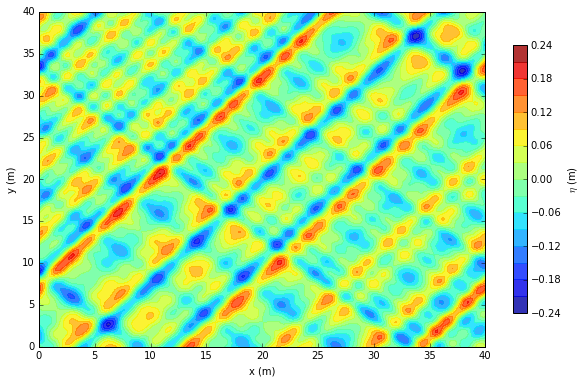

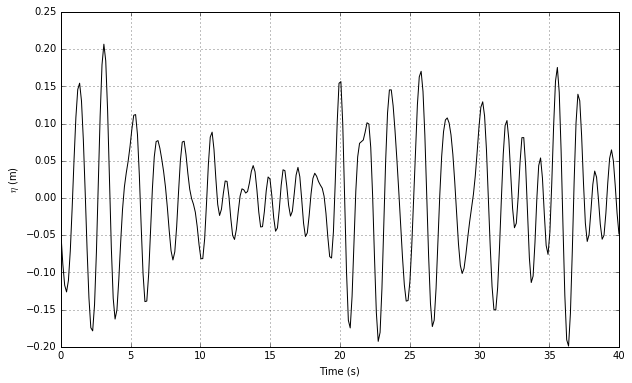

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import imp
#The paths in the two following lines need to be changed, depending on the location of the modules
#The notebook will work with the following commits:
#WaveTools.py: https://github.com/erdc/proteus/commit/5db78fc77b50e26540188bef890259437c83ef4d
#Profiling.py: https://github.com/erdc/proteus/commit/9f4c66a59414f97861246f6fd66214ac67d849d1
Profiling = imp.load_source('Profiling', 'C:/Users/gkm/Desktop/WaveTools_nb/Profiling.py')
WT = imp.load_source('WaveTools', 'C:/Users/gkm/Desktop/WaveTools_nb/WaveTools.py')
import numpy as np


#Setting up the plan view area
n = 300
xi = np.linspace(0, 40, n)
yi=np.linspace(0, 40, n)

eta_t = np.zeros((n, n),)


#Setting up wave properties
Nspectra = 2
Tp = [2., 2.]
Hs = [0.15, 0.3]
depth = 1.
mwl = [0., 0.]
g = np.array([0., 0., -9.81])
N = [101, 101]
bandFactor = [2., 2.]
spectName = ["JONSWAP", "JONSWAP"]
spectral_params = [None, None]
phi = [None, None]
waveDir = [ [1., 1., 0.], [-0.8, 1., 0.] ]


#Calling the class
MS = WT.MultiSpectraRandomWaves(Nspectra,
                             Tp,
                             Hs,
                             mwl,
                             depth,
                             waveDir,
                             g,
                             N,
                             bandFactor,
                             spectName,
                             spectral_params,
                             phi
                             )


#Calculating the free surface elevation calculated from MWL using a 2D plane
for i in range(len(xi)):
    for j in range(len(yi)):
        x = [xi[i], xi[j], 0]
        eta_t[i, j] = MS.eta(x, 0.)

        
#Plotting the contour 
plt.figure(1, figsize=(10,6), dpi=100)
X, Y = np.meshgrid(xi, yi)
CS = plt.contourf(X,Y,eta_t, 16, alpha=0.8, cmap='jet')
plt.xlabel("x (m)", size=10)
plt.ylabel("y (m)", size=10)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
CB.set_label("$\eta$ (m)", size = 10)
plt.show()


#Setting up a time interval of n periods (using npoints sampling points per period)
nperiod = 10
npoints = 30
n = npoints * nperiod
tnlist=np.linspace(0,4*nperiod,n)
eta_t = np.zeros(len(tnlist),)


#Calculating time series
for i in range(len(tnlist)):
    x = [2., 0.5, 0.]
    t = tnlist[i]
    eta_t[i] = MS.eta(x, t)

    
#Plotting time series
plt.figure(2, figsize=(10,6), dpi=100)
plt.xlim(0., 4*nperiod)
plt.plot(tnlist, eta_t, "k-")
plt.xlabel("Time (s)", size=10)
plt.ylabel("$\eta$ (m)", size=10)
plt.grid()
plt.show()
